<a href="https://colab.research.google.com/github/BDouchet/Spotify_dataset/blob/main/DataVisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load dataset

In [3]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from zipfile import ZipFile

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

id='16phKfXvRrwGbOJrNKpgbYnBnZG6icXFX'

downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('dataset.zip')

with ZipFile('dataset.zip', 'r') as zip:
   zip.extractall()
   print('Done')

Done


In [4]:
df=pd.read_csv('dataset/Spotify_train_dataset.csv')
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,song_name,genre
0,0.449,0.809,6,-3.366,1,0.0847,0.002340,0.876000,0.1100,0.1150,142.490,audio_features,15iEkKqQPgXjtHrvvL4Gvb,spotify:track:15iEkKqQPgXjtHrvvL4Gvb,https://api.spotify.com/v1/tracks/15iEkKqQPgXj...,https://api.spotify.com/v1/audio-analysis/15iE...,234310,4,NaN,trap
1,0.618,0.654,5,-14.305,0,0.4220,0.226000,0.864000,0.1110,0.1760,127.953,audio_features,2kLaJQILsNVOyiZvn8XaEc,spotify:track:2kLaJQILsNVOyiZvn8XaEc,https://api.spotify.com/v1/tracks/2kLaJQILsNVO...,https://api.spotify.com/v1/audio-analysis/2kLa...,364098,4,NaN,techno
2,0.696,0.896,7,-5.915,1,0.1080,0.016400,0.866000,0.1030,0.5700,128.001,audio_features,5nBuY24pWqH3GoavwlGd4P,spotify:track:5nBuY24pWqH3GoavwlGd4P,https://api.spotify.com/v1/tracks/5nBuY24pWqH3...,https://api.spotify.com/v1/audio-analysis/5nBu...,506250,4,NaN,techno
3,0.769,0.506,0,-11.658,1,0.0452,0.002730,0.000000,0.0832,0.1020,120.004,audio_features,6GZRum7yJqfnGZGfIcGIaq,spotify:track:6GZRum7yJqfnGZGfIcGIaq,https://api.spotify.com/v1/tracks/6GZRum7yJqfn...,https://api.spotify.com/v1/audio-analysis/6GZR...,232046,4,$UICIDEWAVE,Dark Trap
4,0.400,0.676,11,-7.118,0,0.0927,0.258000,0.000023,0.3200,0.3540,170.148,audio_features,5mZb9Kbl0uWhIS6RW47IHC,spotify:track:5mZb9Kbl0uWhIS6RW47IHC,https://api.spotify.com/v1/tracks/5mZb9Kbl0uWh...,https://api.spotify.com/v1/audio-analysis/5mZb...,180022,4,TR666 (feat. Swae Lee),Underground Rap
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31723,0.855,0.586,6,-7.134,1,0.1670,0.200000,0.000000,0.2530,0.7510,138.132,audio_features,13sDDPTmAwDvkONEQ8OB3i,spotify:track:13sDDPTmAwDvkONEQ8OB3i,https://api.spotify.com/v1/tracks/13sDDPTmAwDv...,https://api.spotify.com/v1/audio-analysis/13sD...,85217,4,Smithy,Underground Rap
31724,0.760,0.726,0,-4.726,1,0.0652,0.057600,0.000000,0.0514,0.8860,139.893,audio_features,0PCKaqffqRsFYxKy7uTLti,spotify:track:0PCKaqffqRsFYxKy7uTLti,https://api.spotify.com/v1/tracks/0PCKaqffqRsF...,https://api.spotify.com/v1/audio-analysis/0PCK...,120059,4,Soul Doubt,Trap Metal
31725,0.464,0.838,8,-6.762,1,0.0401,0.000151,0.756000,0.0671,0.1510,173.995,audio_features,5RCkepCUwImdkbZhIUtglm,spotify:track:5RCkepCUwImdkbZhIUtglm,https://api.spotify.com/v1/tracks/5RCkepCUwImd...,https://api.spotify.com/v1/audio-analysis/5RCk...,350345,4,NaN,dnb
31726,0.683,0.590,0,-4.949,1,0.3590,0.215000,0.000000,0.1350,0.0401,209.986,audio_features,72x9Lcah4SMfE5TRf7gira,spotify:track:72x9Lcah4SMfE5TRf7gira,https://api.spotify.com/v1/tracks/72x9Lcah4SMf...,https://api.spotify.com/v1/audio-analysis/72x9...,117923,4,Seventy Four,Dark Trap


In [5]:
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,31728.000000,31728.000000,31728.000000,31728.000000,31728.000000,31728.000000,31728.000000,31728.000000,31728.000000,31728.000000,31728.000000,31728.000000,31728.000000
mean,0.639464,0.762916,5.376828,-6.469376,0.549294,0.136506,0.095588,0.285514,0.214131,0.356917,147.375311,251374.491553,3.973147
std,0.156270,0.183542,3.661638,2.926137,0.497572,0.126527,0.170582,0.371836,0.175920,0.233563,23.823179,103233.266462,0.269429
min,0.065100,0.000243,0.000000,-33.357000,0.000000,0.022700,0.000001,0.000000,0.010700,0.018700,61.309000,25600.000000,1.000000
25%,0.524000,0.633000,1.000000,-8.161000,0.000000,0.049000,0.001690,0.000000,0.099500,0.160750,129.865250,180000.000000,4.000000
50%,0.646000,0.803000,6.000000,-6.247000,1.000000,0.075500,0.016400,0.006235,0.135000,0.321000,144.958000,225042.500000,4.000000
75%,0.766000,0.922000,9.000000,-4.522000,1.000000,0.193000,0.106000,0.727000,0.293000,0.522000,161.041000,302002.500000,4.000000
max,0.988000,1.000000,11.000000,3.108000,1.000000,0.944000,0.986000,0.989000,0.988000,0.988000,220.290000,913052.000000,5.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31728 entries, 0 to 31727
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      31728 non-null  float64
 1   energy            31728 non-null  float64
 2   key               31728 non-null  int64  
 3   loudness          31728 non-null  float64
 4   mode              31728 non-null  int64  
 5   speechiness       31728 non-null  float64
 6   acousticness      31728 non-null  float64
 7   instrumentalness  31728 non-null  float64
 8   liveness          31728 non-null  float64
 9   valence           31728 non-null  float64
 10  tempo             31728 non-null  float64
 11  type              31728 non-null  object 
 12  id                31728 non-null  object 
 13  uri               31728 non-null  object 
 14  track_href        31728 non-null  object 
 15  analysis_url      31728 non-null  object 
 16  duration_ms       31728 non-null  int64 

# Data preprocessing

*  Drop of useless columns :

`type`, `id`, `uri`, `track_href`, `analysis_url`, `song_name` 

*  Label Encoding of the genres

In [7]:
from sklearn.preprocessing import LabelEncoder

data=df.drop(labels=['type','id','uri','track_href','analysis_url','song_name'],axis=1)

genres=['Dark Trap', 'Underground Rap', 'Trap Metal', 'Emo', 'Rap', 'RnB', 'Pop', 'Hiphop', 'techhouse', 'techno',
'trance', 'psytrance', 'trap', 'dnb', 'hardstyle']

le = LabelEncoder()
le.classes_=genres
data['genre']=le.transform(data['genre'])

X=data[data.columns[:-1]].to_numpy()
Y=data['genre'].to_numpy()


# Data Visualization

*  Histograms of each features
*  Correlation matrix
*  TSNE (t-distributed stochastic neighbor embedding)
*  PCA (Principal Component Analysis)

## Histograms Plots

Histogram plot of the selected features. We observe that `genre` feature is not equally reparted. For instance, `pop` songs are 10 times less represented than `Dark Trap` songs. 

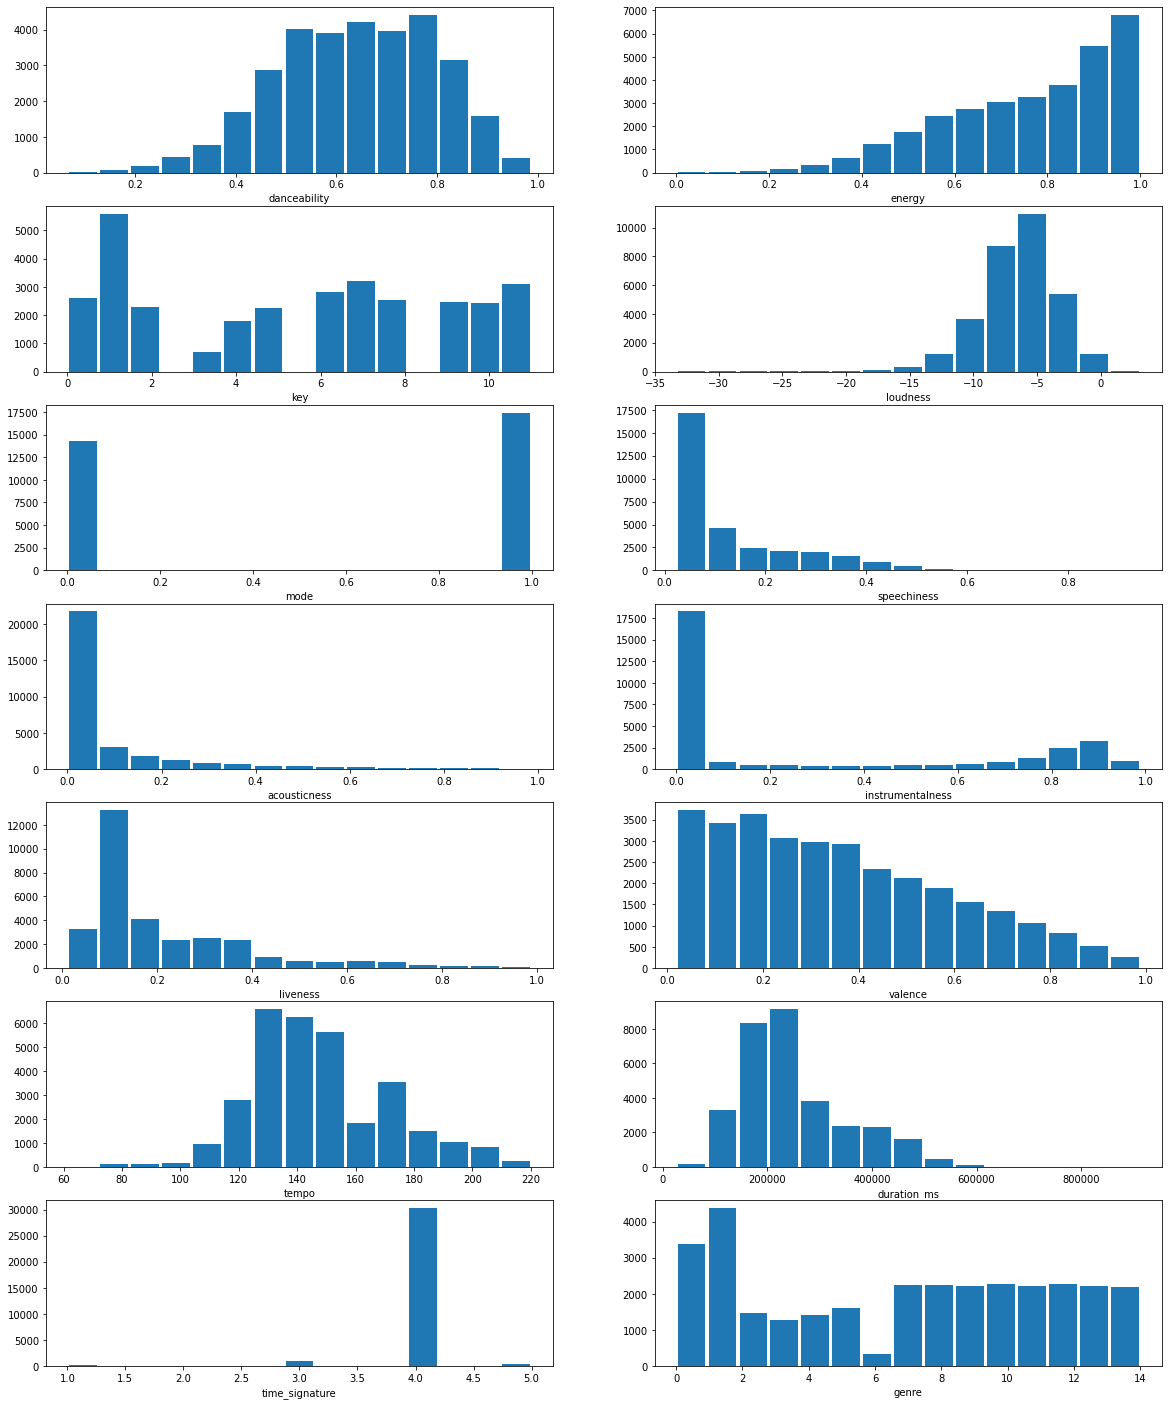

In [10]:
_,axs=plt.subplots(ncols=2,nrows=7,figsize=(20,25))
for i,ax in enumerate(axs.flatten()):
    plt.sca(ax)
    plt.hist(data.iloc[:,i],rwidth=0.9,bins=15)
    plt.xlabel(data.columns[i])
plt.show()

In [8]:
from collections import Counter
count=Counter()
for genre in df['genre']:
    count.update([genre])
count

Counter({'Dark Trap': 3378,
         'Emo': 1262,
         'Hiphop': 2255,
         'Pop': 336,
         'Rap': 1420,
         'RnB': 1605,
         'Trap Metal': 1474,
         'Underground Rap': 4378,
         'dnb': 2213,
         'hardstyle': 2178,
         'psytrance': 2214,
         'techhouse': 2254,
         'techno': 2226,
         'trance': 2275,
         'trap': 2260})

## Correlation Matrix

Correlation matrix is the matrix made of the correlation coefficients between two features. It is calculated as follow :

$r_{X,Y}=\frac{Cov(X,Y)}{\sigma_X\sigma_Y}$.

Thus, $-1<r_{X,Y}<1$. If $|r_{X,Y}|$ is close to $1$, it exists a strong positive (or negative, according to the sign) linear correlation between $X$ and $Y$.

The calculated correlation coefficients goes from -0.50 to 0.60.

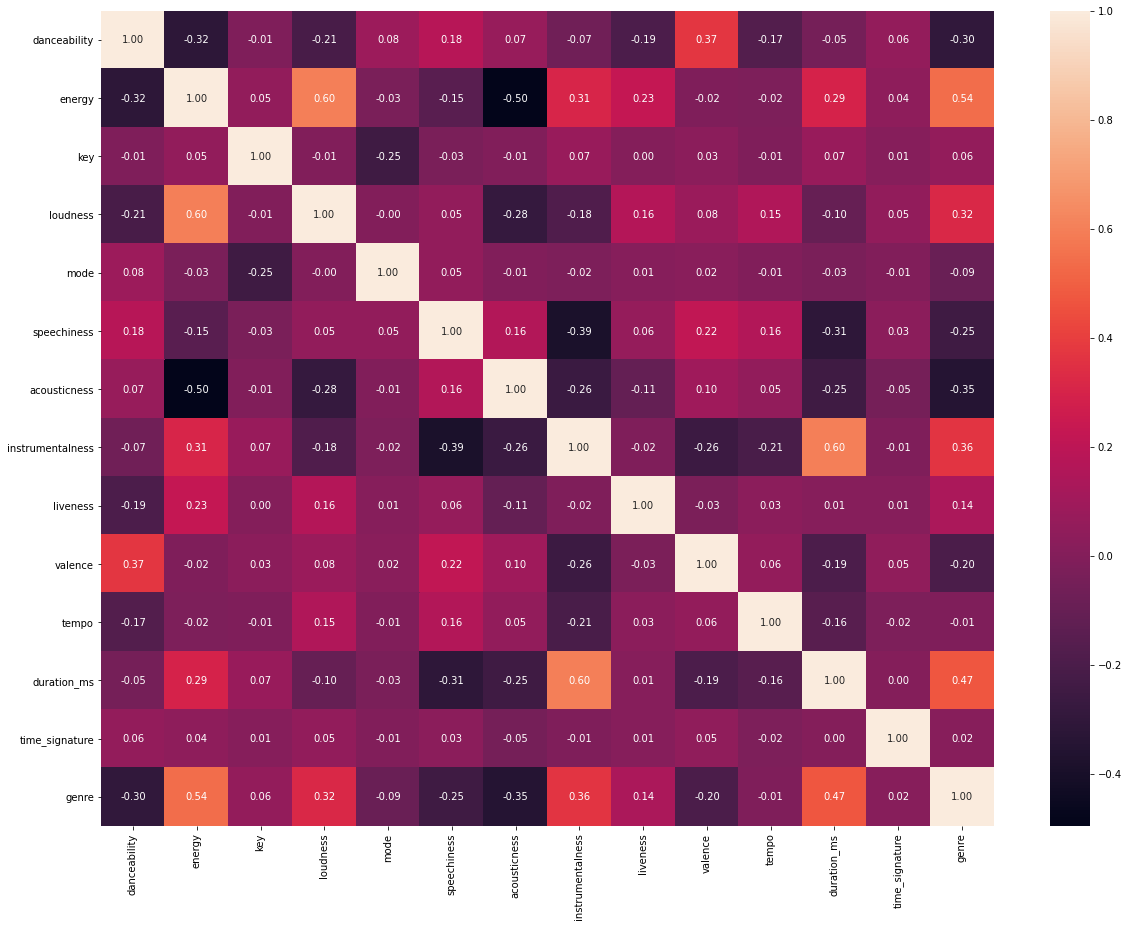

In [ ]:
import seaborn as sn
df_corr=data.corr()
plt.figure(figsize=(20,15))
sn.heatmap(df_corr,annot=True,fmt='.2f')
plt.show()

## TSNE

[TSNE](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding) is an algorithm used to represent high dimensionality datas into a 2D plane. According to skleanr the perplexity parameter is :

> [...] related to the number of nearest neighbors that is used in other manifold learning algorithms. Larger datasets usually require a larger perplexity. Consider selecting a value between 5 and 50. Different values can result in significantly different results.

Because it is an operation computationnaly heavy, we only represented the first 2000 songs in our dataset with a perplexity of 20.

We observe some discernible clusters of genres and others more mixed.

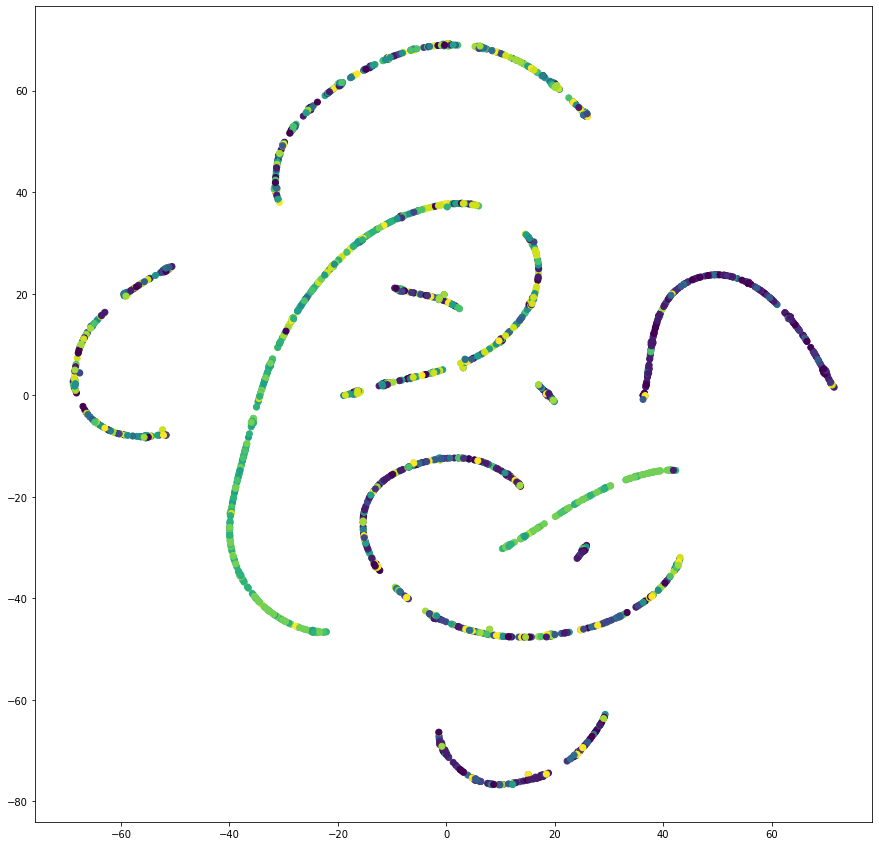

In [17]:
from sklearn.manifold import TSNE

df_embed=TSNE(perplexity=20).fit_transform(X[:2000])

plt.figure(figsize=(15,15))
plt.scatter(df_embed[:,0],df_embed[:,1],c=Y[:2000])
plt.show()

## PCA

PCA is a process similar to TSNE, the idea is to visualize high dimensionality data into a plane. The core idea is to calculate the eigenvalues $\lambda_1,\lambda_2,...\lambda_n$ and their associated eigenvectors $u_1,u_2,...,u_n$ from the correlation matrix. We keep the two highest eigenvalues and project the data on their associate eigenvectors (2D-plane made of $F1$ and $F2$).

The explained variance with $F1$ and $F2$ is 20.0% and 14.8%, so the plane made of $F1$ and $F2$ explains 34,8% of the data.

[0.19971302 0.14781734 0.10247561 0.09584686 0.07467492 0.07189428
 0.06520352 0.05654061 0.05544578 0.04843456 0.03583459 0.03011797
 0.01600094]


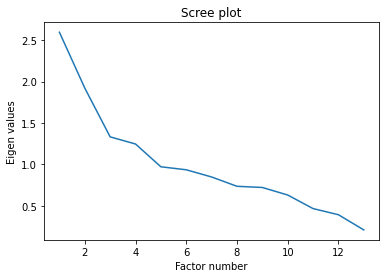

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
sc=StandardScaler()
X_star=sc.fit_transform(X)
pca=PCA(svd_solver='full')
coord=pca.fit_transform(X_star)
n=X.shape[0]
eigval = (n-1)/n*pca.explained_variance_
print(pca.explained_variance_ratio_)
p=pca.n_components_
plt.plot(np.arange(1,p+1),eigval)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()

In [19]:
bs = 1/np.arange(p,0,-1)
bs = np.cumsum(bs)
bs = bs[::-1]
print(pd.DataFrame({'Eigenvalues':eigval,'Thereshold':bs}))

    Eigenvalues  Thereshold
0      2.596269    3.180134
1      1.921625    2.180134
2      1.332183    1.680134
3      1.246009    1.346800
4      0.970774    1.096800
5      0.934626    0.896800
6      0.847646    0.730134
7      0.735028    0.587277
8      0.720795    0.462277
9      0.629649    0.351166
10     0.465850    0.251166
11     0.391534    0.160256
12     0.208012    0.076923


Projection over the plane made of $F1$ and $F2$. We observe large clusters, but the majority of the data is mixed altogether. 

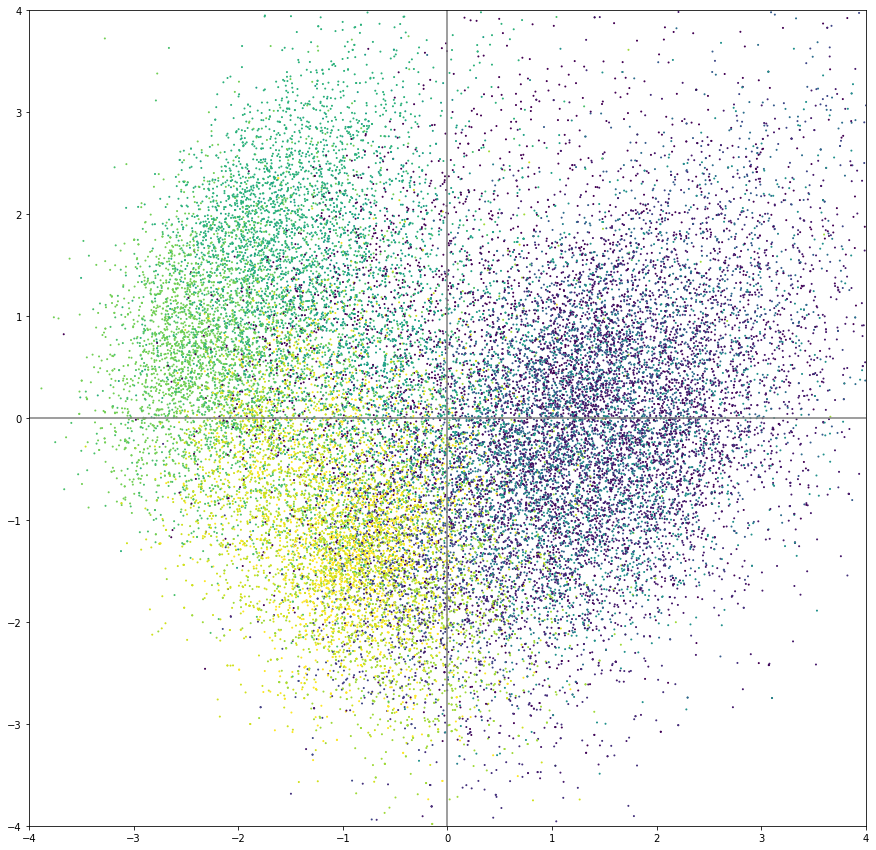

In [ ]:
X_pca=[coord[i,0] for i in range(n)]
Y_pca=[coord[i,1] for i in range(n)]
fig, axes = plt.subplots(figsize=(15,15))
axes.set_xlim(-4,4)
axes.set_ylim(-4,4)
plt.plot([-4,4],[0,0],color='grey')
plt.plot([0,0],[-4,4],color='grey')
plt.scatter(X_pca,Y_pca,s=1,c=Y)
plt.show()

Explainability of $F1$ and $F2$: $F1$ seems at the most part held by th acousticness vector while $F2$ is held by the loudness vector.

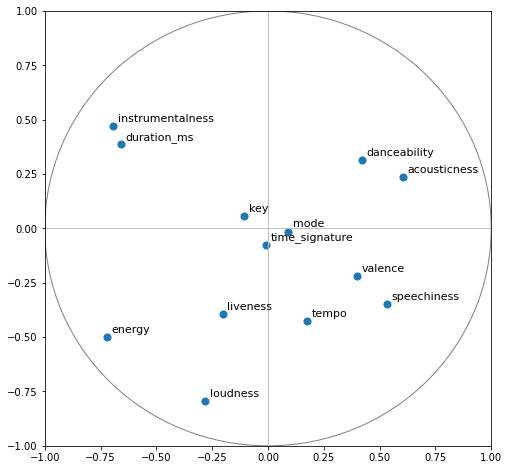

In [20]:
sqrt_eigval = np.sqrt(eigval)
corvar = np.zeros((p,p))
for k in range(p):
    corvar[:,k] = pca.components_[k,:] * sqrt_eigval[k]
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
plt.scatter(corvar[:,0],corvar[:,1],s=50)
for j in range(p):
    plt.annotate(data.columns[j],(corvar[j,0]+0.02,corvar[j,1]+0.02),fontsize=11)
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)
cercle = plt.Circle((0,0),1,color='grey',fill=False)
axes.add_artist(cercle)
plt.show()